<a href="https://colab.research.google.com/github/ankita1200/Machine-Learning-Topics/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [4]:
# read xlsx
df = pd.read_excel('Telco_customer_churn.xlsx')

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.drop(["Churn Label", "Churn Reason", "Churn Score", "CLTV"], inplace=True, axis=1)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [7]:
df["Count"].unique()

array([1])

In [8]:
df["Country"].unique()

array(['United States'], dtype=object)

In [9]:
df.nunique().sort_values()

,0
Count,1
Country,1
State,1
Phone Service,2
Dependents,2
Partner,2
Senior Citizen,2
Gender,2
Paperless Billing,2
Churn Value,2


In [10]:
df.drop(["Count", "Country", "State", "CustomerID", "Lat Long"], axis=1, inplace=True)

In [11]:
df["City"].replace(' ', '_', regex=True, inplace=True)

<ipython-input-11-68ce15d18504>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["City"].replace(' ', '_', regex=True, inplace=True)


In [12]:
df["City"].unique()[:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [13]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [14]:
# identifying missing data
df.dtypes

,0
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64
Phone_Service,object


In [15]:
df["Total_Charges"].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [16]:
# this throws an error, giving a hint that some values are " "
pd.to_numeric(df["Total_Charges"])

ValueError: Unable to parse string " " at position 2234

In [17]:
df.loc[df["Total_Charges"]==' ', "Total_Charges"] = 0

In [18]:
df["Total_Charges"] = pd.to_numeric(df["Total_Charges"])

In [19]:
df.dtypes

,0
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64
Phone_Service,object


In [20]:
df.replace(' ','_', regex=True, inplace=True)

In [21]:
# seperate the features and target
X = df.drop(["Churn_Value"], axis=1).copy()
y = df["Churn_Value"].copy()

In [22]:
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [23]:
y.head()

,Churn_Value
0,1
1,1
2,1
3,1
4,1


In [24]:
X_encoded = pd.get_dummies(X, columns=[
    'City',
    'Gender',
    'Senior_Citizen',
    'Partner',
    'Dependents',
    'Phone_Service',
    'Multiple_Lines',
    'Internet_Service',
    'Online_Security',
    'Online_Backup',
    'Device_Protection',
    'Tech_Support',
    'Streaming_TV',
    'Streaming_Movies',
    'Contract',
    'Paperless_Billing',
    'Payment_Method'
])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,2,70.70,151.65,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048013,-118.293953,8,99.65,820.50,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062125,-118.315709,28,104.80,3046.05,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


In [25]:
# confirms y only contains 1s and 0s
y.unique()

array([1, 0])

In [26]:
# XGBoost uses sparse matrix to only keep track of 1s
sum(y) / len(y) * 100

26.536987079369588

# Only 27% of people left the company. Data is imbalanced. When we split the data into training and test set, we use stratification in order to maintain same percentage of people who left the company in training and test set.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [28]:
sum(y_train) / len(y_train) * 100

26.54297614539947

In [29]:
sum(y_test) / len(y_test) * 100

26.519023282226005

In [30]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    # Change missing to np.nan
    missing=np.nan,
    seed=42,
    eval_metric='aucpr',
    early_stopping_rounds=10
)

xgb_clf.fit(
    X_train,
    y_train,
    verbose=True,
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-aucpr:0.64135
[1]	validation_0-aucpr:0.65171
[2]	validation_0-aucpr:0.65991
[3]	validation_0-aucpr:0.65350
[4]	validation_0-aucpr:0.65743
[5]	validation_0-aucpr:0.65051
[6]	validation_0-aucpr:0.65827
[7]	validation_0-aucpr:0.65980
[8]	validation_0-aucpr:0.65751
[9]	validation_0-aucpr:0.65389
[10]	validation_0-aucpr:0.65572
[11]	validation_0-aucpr:0.65920
[12]	validation_0-aucpr:0.66010
[13]	validation_0-aucpr:0.65963
[14]	validation_0-aucpr:0.65877
[15]	validation_0-aucpr:0.65791
[16]	validation_0-aucpr:0.65808
[17]	validation_0-aucpr:0.65742
[18]	validation_0-aucpr:0.65770
[19]	validation_0-aucpr:0.65698
[20]	validation_0-aucpr:0.65733
[21]	validation_0-aucpr:0.65646
[22]	validation_0-aucpr:0.65650


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

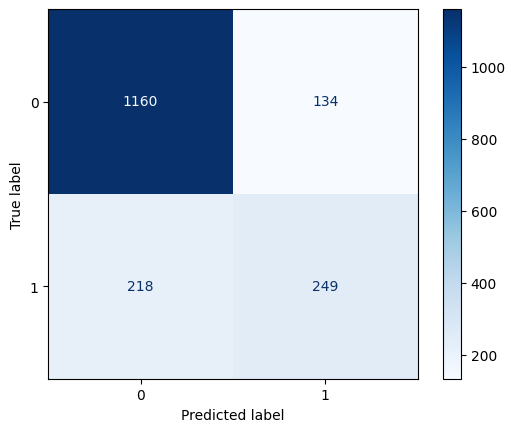

In [31]:
y_pred = xgb_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

In [33]:
# xgboost has a parameter scale_pos_weight that helps deal with imbalanced data
param_grid = {'learning_rate':[0.1, 0.01, 0.05],
              'max_depth':[3, 4, 5],
              'gamma':[0, 0.25, 1.0],
              'reg_lambda':[0, 1.0, 10,0],
              'scale_pos_weight':[1, 3, 5]}

In [32]:
xgb_clf =

In [46]:
optimal_params = GridSearchCV(estimator= xgb.XGBClassifier(objective='binary:logistic',
                            subsample=0.9,
                            colsample_bytree=0.5),
             param_grid=param_grid,
             scoring='roc_auc',
             verbose=2,
             n_jobs=10,
             cv=3)

In [47]:
optimal_params.fit(X_train, y_train, verbose=2)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10, 0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)

In [49]:
best_model = xgb.XGBClassifier(
    objective='binary:logistic',
    subsample=0.9,
    colsample_bytree=0.5,
    use_label_encoder=False,
    eval_metric='auc',
    **optimal_params.best_params_  # Include best hyperparameters
)

# Retrain with early stopping using validation set
best_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)


[0]	validation_0-auc:0.80886
[1]	validation_0-auc:0.84175
[2]	validation_0-auc:0.83902
[3]	validation_0-auc:0.83695


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:40:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation_0-auc:0.84055
[5]	validation_0-auc:0.84254
[6]	validation_0-auc:0.84460
[7]	validation_0-auc:0.84702
[8]	validation_0-auc:0.84730
[9]	validation_0-auc:0.84902
[10]	validation_0-auc:0.85080
[11]	validation_0-auc:0.85139
[12]	validation_0-auc:0.85213
[13]	validation_0-auc:0.85224
[14]	validation_0-auc:0.85211
[15]	validation_0-auc:0.85309
[16]	validation_0-auc:0.85433
[17]	validation_0-auc:0.85545
[18]	validation_0-auc:0.85634
[19]	validation_0-auc:0.85708
[20]	validation_0-auc:0.85717
[21]	validation_0-auc:0.85760
[22]	validation_0-auc:0.85790
[23]	validation_0-auc:0.85825
[24]	validation_0-auc:0.85762
[25]	validation_0-auc:0.85785
[26]	validation_0-auc:0.85810
[27]	validation_0-auc:0.85835
[28]	validation_0-auc:0.85878
[29]	validation_0-auc:0.85875
[30]	validation_0-auc:0.85891
[31]	validation_0-auc:0.85876
[32]	validation_0-auc:0.85925
[33]	validation_0-auc:0.85963
[34]	validation_0-auc:0.85988
[35]	validation_0-auc:0.85991
[36]	validation_0-auc:0.86001
[37]	validation_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)